# Import Packages

In [571]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy import stats
import seaborn as sns
sns.set_context('talk')
import os

# Set Paths

In [572]:
data_path='/Users/danielbabin/Documents/GitHub/T2_Timing/Data/'
figure_path='/Users/danielbabin/Documents/GitHub/T2_Timing/Figures/'

# Import Data
## Dome Fuji
Timescale + Gases and Temperature

In [573]:
df_ice_d18o.columns

Index(['TopDepth', 'TopAge', 'CenterAge', 'd18O'], dtype='object')

In [574]:
df_co2=pd.read_csv(data_path+'df-co2-dry-260ka-2007.csv',header=116,nrows=95)
df_co2['GasAge']=df_co2['GasAge']/1000
df_co2['IceAge']=df_co2['IceAge']/1000

df_timescale1=pd.read_csv(data_path+'df-co2-dry-260ka-2007.csv',header=211+11).drop(columns=['Unnamed: 2',
                                                                                     'Unnamed: 3',
                                                                                     'Unnamed: 4'])

df_ice_d18o=pd.read_csv(data_path+'df-d18o-340ka-dfo2006.txt',sep='\t',header=92+25)
df_ice_d18o['TopAge']=df_ice_d18o['TopAge']/1000
df_ice_d18o['CenterAge']=df_ice_d18o['CenterAge']/1000

df_temp=pd.read_csv(data_path+'df-tsite-340ka-dfo2006.txt',sep='\t',header=142)
df_temp['TopAge']=df_temp['TopAge']/1000
df_temp['CenterAge']=df_temp['CenterAge']/1000

df_timescale2=pd.read_csv(data_path+'dfo-2006-timescale-340ka.txt',sep='\t',header=121)

df={}
df['CO2']=df_co2
df['TS1']=df_timescale1
df['TS2']=df_timescale2
df['ice_d18O']=df_ice_d18o
df['T']=df_temp

## EDC Gas
We know the gas-temperature-snow phasing is good in this core

In [618]:
edc_d15n=pd.read_csv(data_path+'edc2013d15n.txt',header=131,sep='\t',index_col='depth_m')
edc_co2=pd.read_csv(data_path+'edc2013co2.txt',header=131,sep='\t',index_col='depth_m')
edc_air_d18o=pd.read_csv(data_path+'edc2013d18oatm.txt',header=131,sep='\t',index_col='depth_m')
edc_timescale=pd.read_csv(data_path+'edc3-timescale.txt',header=115,sep='\t')
edc_methane=pd.read_csv(data_path+'edc-ch4-2008.txt',sep='\t',index_col='Depth')


edc={}
edc['CO2']=edc_co2
edc['d15n']=edc_d15n
edc['air_d18O']=edc_air_d18o
edc['TS']=edc_timescale
edc['ch4']=edc_methane

## Chinese Speleothem
Low Latitude Hydrologic Cycle, sensitive to abrupt climate change

In [619]:
spel=pd.read_csv(data_path+'cheng2016speleothem.csv',index_col='Age (ka BP)')
spel=spel[~spel.index.duplicated(keep='first')].copy()
spel.sort_index(inplace=True)

## Coral Terrace Dates
Sea Level

In [620]:
sl=pd.read_csv(data_path+'sea_level_dates.csv')
sl

,Event,Archive,Location,Date,Uncertainty,Source
0,Mid-Point,Aragonite-rich seds,Bahamas,135.0,2.0,Henderson and Slowey (2000)
1,Start 5E,Coral,West Australia,128.0,1.0,Stirling et al. 1998
2,Start 5e,Speleothem,Devil's Hole,129.1,0.8,Edwards et al. 1997
3,End 5E,Coral,West Australia,116.1,0.9,Stirling et al. 1998
4,Start 5a,Speleothem,Devil's Hole,82.9,0.4,Edwards et al. 1997


## Orbital Solutions

In [621]:
jun=pd.read_csv(data_path+'Jun21_65N_DailyInsolation_200ky.rtf',sep='\t',header=7,index_col='time')
jul=pd.read_csv(data_path+'Jul21_65N_DailyInsolation_200ky.rtf',sep='\t',header=7,index_col='time')
dec=pd.read_csv(data_path+'Dec21_77S_DailyInsolation_200ky.rtf',sep='\t',header=7,index_col='time')
for m in [jun,jul,dec]:
    m['insolation\\']=m['insolation\\'].str.split("\\", n = 1, expand = True)[0]
    m.drop(200,inplace=True)
    m['insolation\\']=m['insolation\\'].astype(float)

# Analysis
## The Age of Gas in Dome Fuji is set using O2/N2 and Insolation
<img src="kawamura2007.png">
From Kawamura et al. 2007, Nature

## With a high quality age model, how does insolation compare to other proxies?

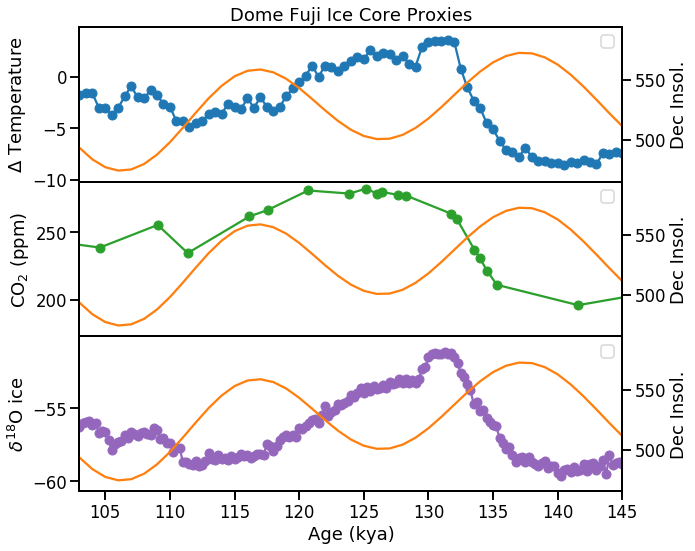

In [622]:
fig,axes=plt.subplots(nrows=3,figsize=(10,8),sharex=True)
ax=axes[0]
df['T'].plot(x='TopAge',y='deltaT',ax=ax,marker='o')
sec=dec['insolation\\'].plot(ax=ax,secondary_y=True,c='tab:orange')
ax.legend([])
ax.set_ylabel('$\Delta$ Temperature')
sec.set_ylabel('Dec Insol.')

ax=axes[1]
df['CO2'].plot(x='GasAge',y='CO2dry',ax=ax,marker='o',c='tab:green')
sec=dec['insolation\\'].plot(ax=ax,secondary_y=True,c='tab:orange')
ax.legend([])
ax.set_ylabel('CO$_2$ (ppm)')
sec.set_ylabel('Dec Insol.')

ax=axes[2]
df['ice_d18O'].plot(x='TopAge',y='d18O',ax=ax,marker='o',c='tab:purple')
sec=dec['insolation\\'].plot(ax=ax,secondary_y=True,c='tab:orange')
sec.set_ylabel('Dec Insol.')
ax.set_ylabel('$\delta^{18}$O ice')
ax.legend([])

ax.set_xlim(103,145)
ax.set_xlabel('Age (kya)')
axes[0].set_title('Dome Fuji Ice Core Proxies')

plt.tight_layout()
plt.subplots_adjust(hspace=0)

The rising SH insolation initiates a rise in temperature and CO2.<br>
The CO$_2$ record is low resolution.

## Epica Dome C has High Resolution CO2 Record Across TII

Text(0.5, 1.0, 'Epica Dome C CO2 Record on Depth')

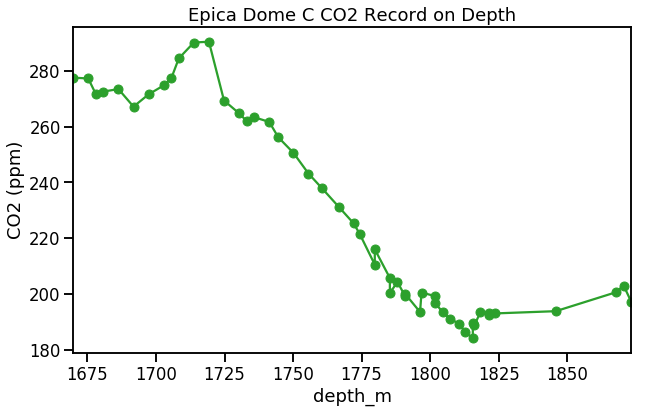

In [623]:
fig,ax=plt.subplots(figsize=(10,6))
edc['CO2']['co2_ppm'].plot(ax=ax,marker='o',c='tab:green')
ax.set_ylabel('CO2 (ppm)')
ax.set_title('Epica Dome C CO2 Record on Depth')

**What if we transferred the EDC CO2 record to Dome Fuji age model? Both cores have a high res T records.**
## Tune d15N (temperature) at EDC to $\Delta$T at Dome Fuji
### Before

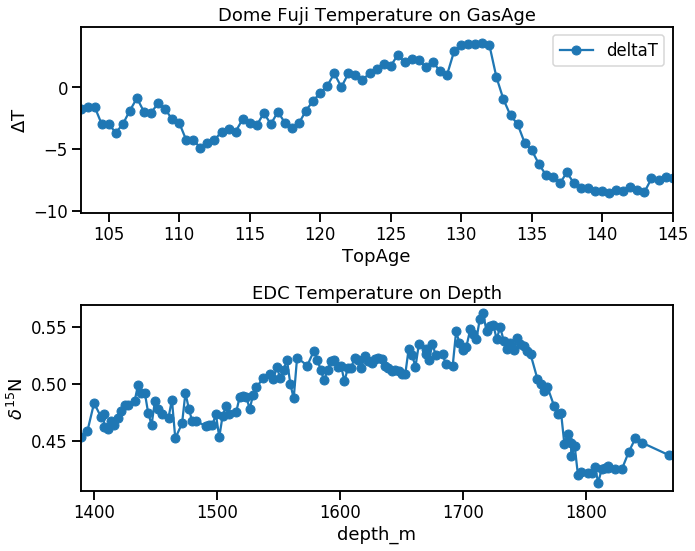

In [624]:
fig,axes=plt.subplots(nrows=2,figsize=(10,8))
ax=axes[0]
df['T'].plot(x='TopAge',y='deltaT',ax=ax,marker='o')
ax.set_xlim(103,145)
ax.set_ylabel('$\Delta$T')
ax.set_title('Dome Fuji Temperature on GasAge')

ax=axes[1]
edc['d15n']['d15Nair'].plot(ax=ax,marker='o')
ax.set_ylabel('$\delta^{15}$N')
ax.set_title('EDC Temperature on Depth')

plt.tight_layout()

#### Ouput two timeseries...

In [625]:
dft=df['T'].set_index('TopAge').loc[1.03e5:1.4e5,'deltaT']
dft.to_csv(data_path+'Tuning/'+'dft.csv',header=True)

In [626]:
edc['d15n'].to_csv(data_path+'Tuning/'+'edct.csv',header=True)

***Use QAnalyseries***

## After

In [650]:
tiepoints=pd.read_csv(data_path+'Tuning/'+'tie_points.txt',header=-1,sep=' ')
tiepoints.rename(columns={0:'Depth',1:'Age'},inplace=True)

In [651]:
from scipy import interpolate

In [652]:
f=interpolate.interp1d(tiepoints['Depth'],(tiepoints['Age']/1000),bounds_error=False,fill_value='extrapolate')
edc['d15n']['New Age']=f(edc['d15n'].index)
edc['CO2']['New Age']=f(edc['CO2'].index)
edc['ch4']['New Age']=f(edc['ch4'].index)

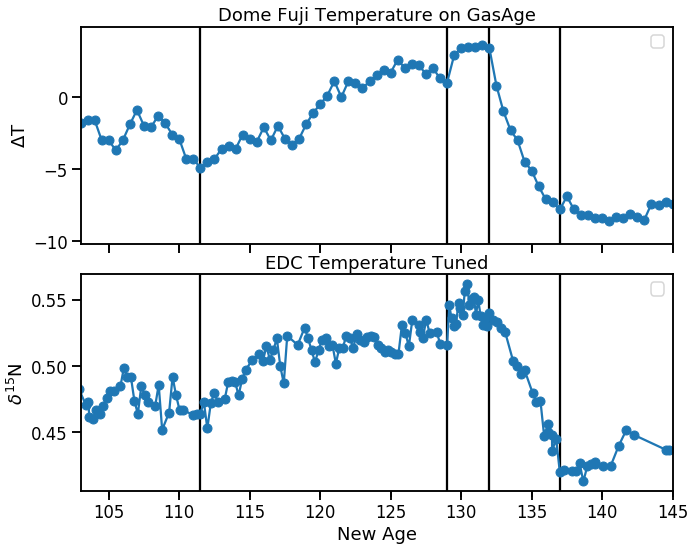

In [653]:
fig,axes=plt.subplots(nrows=2,figsize=(10,8),sharex=True)
ax=axes[0]
df['T'].plot(x='TopAge',y='deltaT',ax=ax,marker='o')
ax.set_ylabel('$\Delta$T')
ax.set_title('Dome Fuji Temperature on GasAge')
ax.legend([])

ax.set_xlim(103,145)

ax=axes[1]
edc['d15n'].plot(x='New Age',y='d15Nair',ax=ax,marker='o')
ax.set_ylabel('$\delta^{15}$N')
ax.set_title('EDC Temperature Tuned')
ax.legend([])

for i in (tiepoints.Age/1000):
    axes[0].axvline(i,color='k',zorder=-1)
    axes[1].axvline(i,color='k',zorder=-1)
    
ax.set_xlim(103,145)

plt.tight_layout()
plt.subplots_adjust(hspace=.14)

# Result: EPICA Dome C CO2

In [654]:
f=interpolate.interp1d(edc['TS']['Depth'],edc['TS']['Air Age']/1000,bounds_error=False,fill_value='extrapolate')
edc['CO2']['EDC_Age']=f(edc['CO2'].index)
edc['ch4']['EDC_Age']=f(edc['ch4'].index)

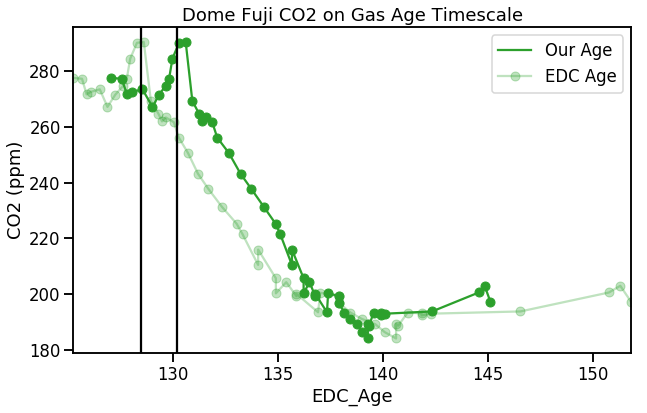

In [655]:
fig,ax=plt.subplots(figsize=(10,6))
edc['CO2'].plot(x='New Age',y='co2_ppm',ax=ax,marker='o',color='tab:green',label='Our Age')
edc['CO2'].plot(x='EDC_Age',y='co2_ppm',ax=ax,marker='o',color='tab:green',alpha=.3,label='EDC Age')
ax.set_ylabel('CO2 (ppm)')
ax.set_title('Dome Fuji CO2 on Gas Age Timescale')
ax.axvline(128.5,color='k')
ax.axvline(130.2,color='k')

Our age is 1.7 ka earlier. 
## EDC Age Model for TII
<img src="parrenin2007.png">
from Parrenin et al. 2007, Climate of the Past. <br>
Their age model for TII is attached to Chinese Cave Speleothe

## EDC CO2 compared to sea level proxies

In [681]:
sl

,Event,Archive,Location,Date,Uncertainty,Source
0,Mid-Point,Aragonite-rich seds,Bahamas,135.0,2.0,Henderson and Slowey (2000)
1,Start 5E,Coral,West Australia,128.0,1.0,Stirling et al. 1998
2,Start 5e,Speleothem,Devil's Hole,129.1,0.8,Edwards et al. 1997
3,End 5E,Coral,West Australia,116.1,0.9,Stirling et al. 1998
4,Start 5a,Speleothem,Devil's Hole,82.9,0.4,Edwards et al. 1997


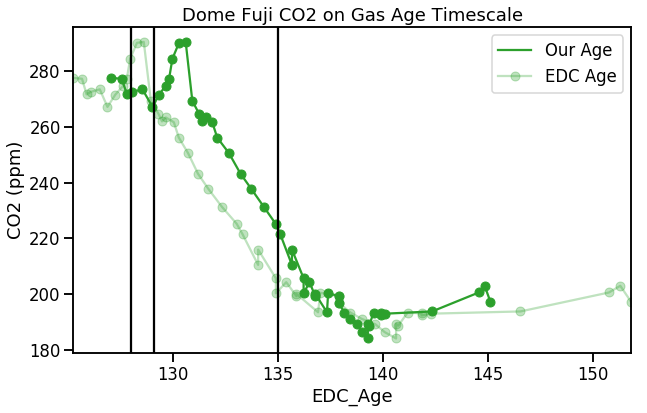

In [660]:
fig,ax=plt.subplots(figsize=(10,6))
edc['CO2'].plot(x='New Age',y='co2_ppm',ax=ax,marker='o',color='tab:green',label='Our Age')
edc['CO2'].plot(x='EDC_Age',y='co2_ppm',ax=ax,marker='o',color='tab:green',alpha=.3,label='EDC Age')
ax.set_ylabel('CO2 (ppm)')
ax.set_title('Dome Fuji CO2 on Gas Age Timescale')

for d in sl.Date:
    ax.axvline(d,c='k')
#     ax.axvspan(xmin=d-sl[sl.Date==d,'Uncertainty'],xmax=d+sl[sl.Date==d,'Uncertainty'])

## EDC CO2 compared to speleothems

(-5.5, -11)

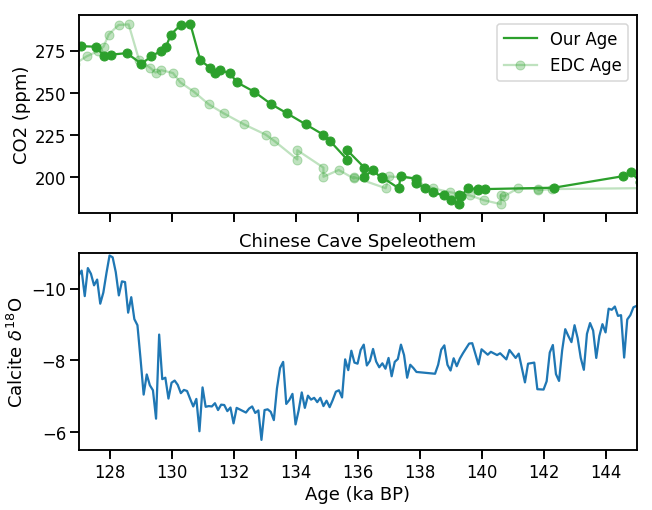

In [665]:
fig,axes=plt.subplots(nrows=2,sharex=True,figsize=(10,8))
ax=axes[0]
edc['CO2'].plot(x='New Age',y='co2_ppm',ax=ax,marker='o',color='tab:green',label='Our Age')
edc['CO2'].plot(x='EDC_Age',y='co2_ppm',ax=ax,marker='o',color='tab:green',alpha=.3,label='EDC Age')
ax.set_ylabel('CO2 (ppm)')
ax=axes[1]
spel['δ18O'].plot(ax=ax)
ax.set_ylabel('Calcite $\delta^{18}$O')
ax.set_title('Chinese Cave Speleothem')
ax.invert_yaxis()
ax.set_xlim(127,145)
ax.set_ylim(-5.5,-11)

## EDC Methane compared to speleothems

In [658]:
edc['ch4'].columns

Index(['GasAge', 'CH4 mean', '1s', 'Lab', 'EDC_Age', 'New Age'], dtype='object')

In [680]:
sl

,Event,Archive,Location,Date,Uncertainty,Source
0,Mid-Point,Aragonite-rich seds,Bahamas,135.0,2.0,Henderson and Slowey (2000)
1,Start 5E,Coral,West Australia,128.0,1.0,Stirling et al. 1998
2,Start 5e,Speleothem,Devil's Hole,129.1,0.8,Edwards et al. 1997
3,End 5E,Coral,West Australia,116.1,0.9,Stirling et al. 1998
4,Start 5a,Speleothem,Devil's Hole,82.9,0.4,Edwards et al. 1997


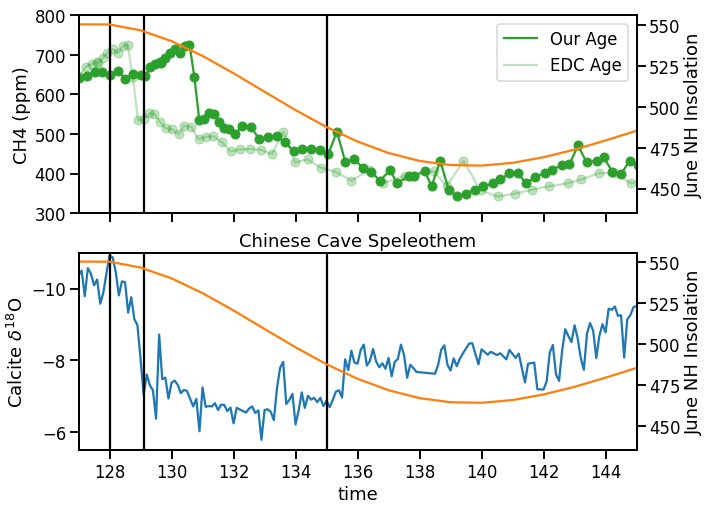

In [679]:
fig,axes=plt.subplots(nrows=2,sharex=True,figsize=(10,8))
ax=axes[0]
edc['ch4'].plot(x='New Age',y='CH4 mean',ax=ax,marker='o',color='tab:green',label='Our Age')
edc['ch4'].plot(x='EDC_Age',y='CH4 mean',ax=ax,marker='o',color='tab:green',alpha=.3,label='EDC Age')
ax.set_ylabel('CH4 (ppm)')
ax.set_ylim(300,800)
sec=jun['insolation\\'].plot(ax=ax,secondary_y=True,color='tab:orange')
sec.set_ylabel('June NH Insolation')

ax=axes[1]
spel['δ18O'].plot(ax=ax)
ax.set_ylabel('Calcite $\delta^{18}$O')
ax.set_title('Chinese Cave Speleothem')
sec=jun['insolation\\'].plot(ax=ax,secondary_y=True)
sec.set_ylabel('June NH Insolation')
ax.invert_yaxis()
ax.set_xlim(127,145)
ax.set_ylim(-5.5,-11)

for d in sl.Date:
    axes[0].axvline(d,c='k')
    axes[1].axvline(d,c='k')